<a href="https://colab.research.google.com/github/ramprakashyadav/OCR/blob/main/Extracting_Text_from_PDF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 154 kB of archives.
After this operation, 613 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 poppler-utils amd64 0.62.0-2ubuntu2.12 [154 kB]
Fetched 154 kB in 1s (297 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../poppler-utils_0.62.0-2ubuntu2.12_amd64.deb ...
Unpacking poppler-utils (0.62.0-2ubuntu2.12) ...
Setting up poppler-utils (0.62.0-2ubuntu2.12) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [2]:
!pip install pdf2image
!pip install easyocr

     |████████████████████████████████| 63.6 MB 59 kB/s 
     |████████████████████████████████| 47.6 MB 1.5 MB/s 


In [3]:
from pdf2image import convert_from_path
import easyocr
import numpy as np
import PIL
from PIL import ImageDraw
import spacy

In [4]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [5]:
images = convert_from_path('LalitEnterprises.pdf')

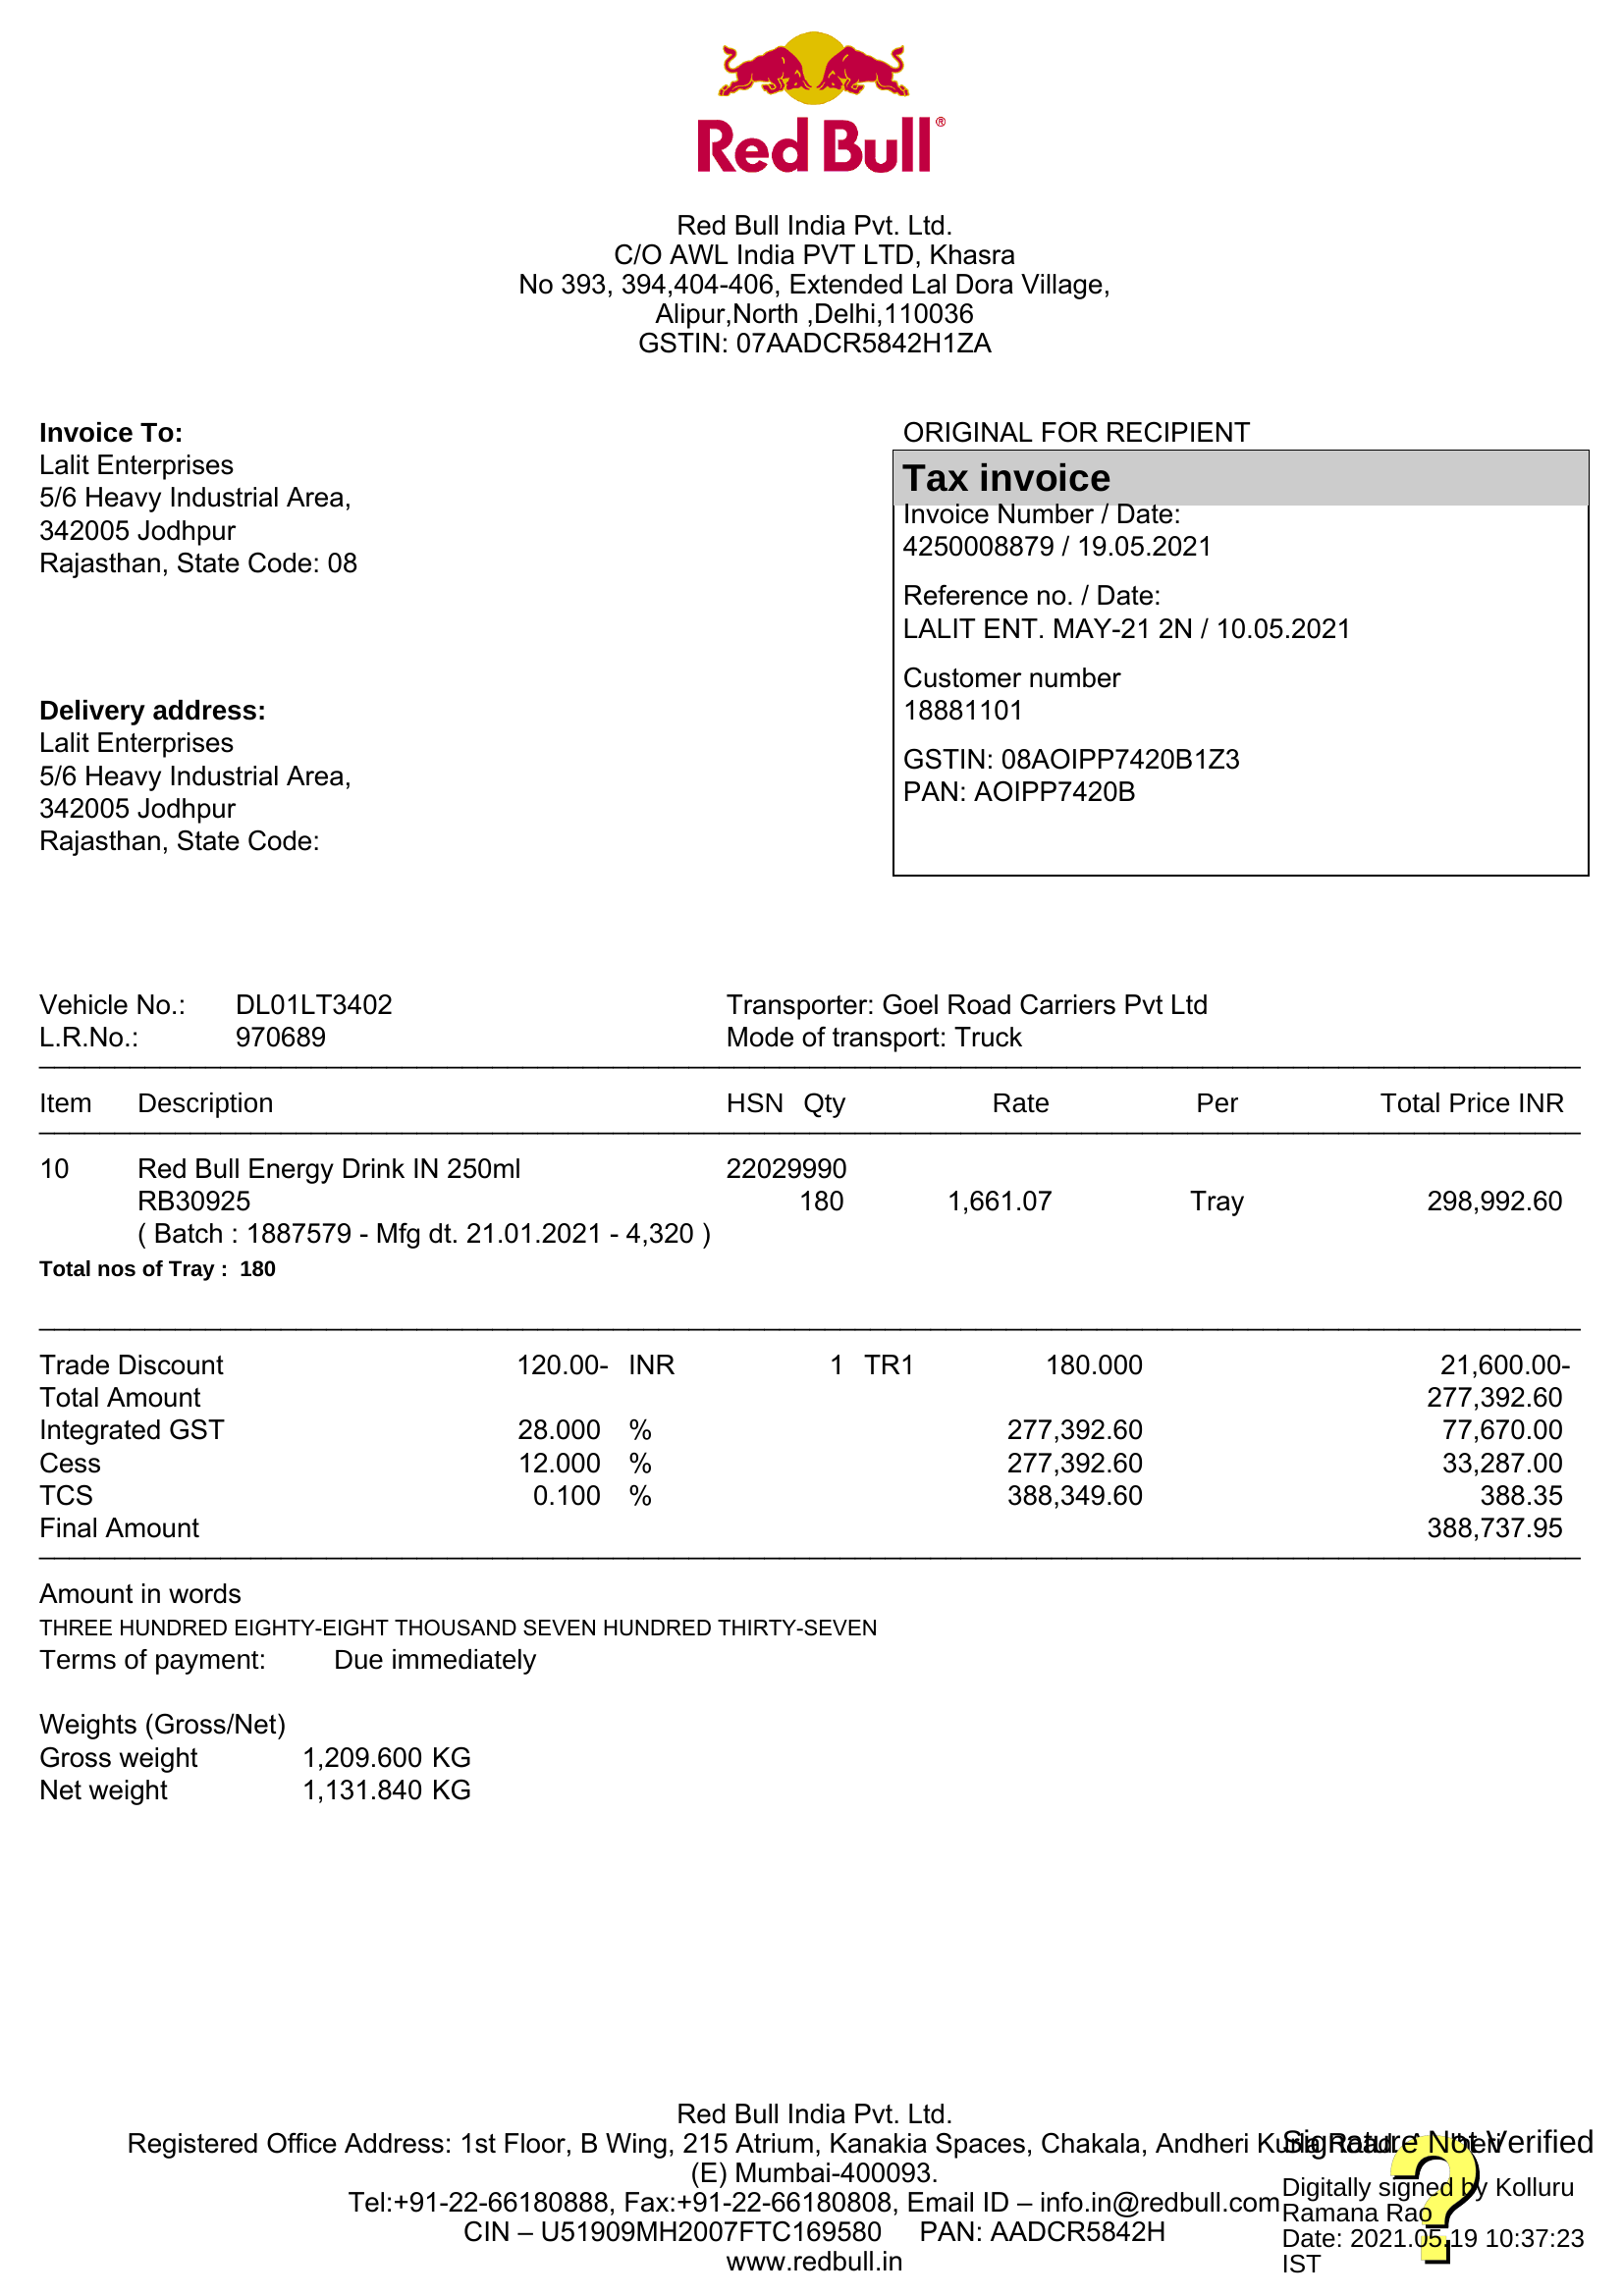

In [6]:
from IPython.display import display, Image
display(images[0])

In [9]:
bounds = reader.readtext(np.array(images[0]), min_size=0, slope_ths=0.2, ycenter_ths=0.7, height_ths=0.6, width_ths=0.8,decoder='beamsearch',beamWidth=10)
bounds

[([[700, 112], [960, 112], [960, 184], [700, 184]],
  'Red Bull-',
  0.8408808871619757),
 ([[687, 212], [971, 212], [971, 248], [687, 248]],
  'Red Bull India Pvt: Ltd.',
  0.6748420247681203),
 ([[624, 244], [1038, 244], [1038, 276], [624, 276]],
  'CIO AWL India PVT LTD, Khasra',
  0.993105593019012),
 ([[527, 272], [1137, 272], [1137, 311], [527, 311]],
  'No 393, 394,404-406, Extended Lal Dora Vilage,',
  0.8350997504768082),
 ([[663, 301], [997, 301], [997, 342], [663, 342]],
  'Alipur,North , Delhi,110036',
  0.5395266738769805),
 ([[648, 334], [1012, 334], [1012, 366], [648, 366]],
  'GSTIN: O7AADCRS842HIZA',
  0.7084348802541202),
 ([[38, 426], [190, 426], [190, 456], [38, 456]],
  'Invoice To:',
  0.99836188892794),
 ([[918, 426], [1277, 426], [1277, 456], [918, 456]],
  'ORIGINAL FOR RECIPIENT',
  0.9160516702591429),
 ([[38, 460], [242, 460], [242, 492], [38, 492]],
  'Lalit Enterprises',
  0.8106755694200355),
 ([[919, 465], [1137, 465], [1137, 507], [919, 507]],
  'Tax in

In [12]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return images

draw_boxes(images[0], bounds)    

[<PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339 at 0x7FBE1B3C1250>,
 <PIL.PpmImagePlugin.PpmImageFile image mode=RGB size=1653x2339 at 0x7FBE1B3C1BD0>]

In [11]:
bounds[1][1]

'Red Bull India Pvt: Ltd.'

In [13]:
text=''
for i in range(len(bounds)):
  text = text + bounds[i][1] +'\n'

print(text)  

Red Bull-
Red Bull India Pvt: Ltd.
CIO AWL India PVT LTD, Khasra
No 393, 394,404-406, Extended Lal Dora Vilage,
Alipur,North , Delhi,110036
GSTIN: O7AADCRS842HIZA
Invoice To:
ORIGINAL FOR RECIPIENT
Lalit Enterprises
Tax invoice
5/6 Heavy Industrial Area,
Invoice Number / Date:
342005 Jodhpur
4250008879
19.05.2021
Rajasthan, State Code: 08
Reference no.
Date:
LALIT ENT. MAY-21 2N
10.05.2021
Customer number
Delivery address:
18881101
Lalit Enterprises
GSTIN: O8AOIPP7420B123
5/6 Heavy Industrial Area,
PAN: AOIPPZ4ZOB
342005 Jodhpur
Rajasthan; State Code:
Vehicle No.
DLOILT3402
Transporter: Goel Road Carriers Pvt Ltd
LRNo._
970689
Mode of transport: Truck
Item
Description
HSN   Qty
Rate
Per
Total Price INR
10
Red Bull Energy Drink IN 250ml
22029990
RB30925
180
1,661.07
Tray
298,992.60
Batch : 1887579 - Mfg dt: 21.01.2021
4,320 )
Total nos of Tray
180
Trade Discount
120.00- INR
1
TRI
180.000
21,600.00-
Total Amount
277,392.60
Integrated GST
28.000
%
277,392.60
77,670.00
Cess
12.000
%
277,39

In [14]:
nlp=spacy.load('en_core_web_sm')

In [15]:
doc = nlp(text)

In [17]:
from spacy import displacy
displacy.render(nlp(doc.text),style='ent', jupyter=True)